In [51]:
import pandas as pd
import numpy as np

In [52]:
data= pd.read_csv("C://Users/hugoa/Ironhack/Week_5/Mid_bootcamp_project/Data/Cleaned/clean.csv", index_col=0)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 370
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      317 non-null    object 
 1   Certificate                305 non-null    object 
 2   Runtime                    317 non-null    int64  
 3   Genre                      317 non-null    object 
 4   IMDB_Rating                317 non-null    float64
 5   Meta_score                 295 non-null    float64
 6   Director                   317 non-null    object 
 7   Star1                      317 non-null    object 
 8   Star2                      317 non-null    object 
 9   No_of_Votes                317 non-null    int64  
 10  Gross                      317 non-null    int64  
 11  rank_afc_2007              75 non-null     float64
 12  rank_afc_1998              71 non-null     float64
 13  rank_wga_2005              77 non-null     float64

In [57]:
def split(x):
    
    categorical = x.select_dtypes("object")
    numerical= x.select_dtypes("int64", "float64")
    
    categorical = pd.DataFrame(categorical)
    numerical = pd.DataFrame(numerical)
    return categorical, numerical

In [58]:
categorical, numerical = split(data)
categorical.head()

,title,Certificate,Genre,Director,Star1,Star2,included_in_1001_book,rated,released,genre,director,writer,actors,language,country,awards,imdb_votes,month_name
0,The Shawshank Redemption,A,Drama,Frank Darabont,Tim Robbins,Morgan Freeman,True,R,14-Oct-94,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",English,USA,Nominated for 7 Oscars. Another 18 wins & 30 n...,"1,711,064",October
1,The Godfather,A,Crime,Francis Ford Coppola,Marlon Brando,Al Pacino,True,R,24-Mar-72,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",English,USA,Won 3 Oscars. Another 23 wins & 27 nominations.,"1,169,904",March
2,The Dark Knight,UA,Action,Christopher Nolan,Christian Bale,Heath Ledger,True,PG-13,18-Jul-08,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",English,USA,Won 2 Oscars. Another 146 wins & 142 nominations.,"1,699,835",July
3,The Godfather: Part II,A,Crime,Francis Ford Coppola,Al Pacino,Robert De Niro,True,R,20-Dec-74,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",English,USA,Won 6 Oscars. Another 10 wins & 20 nominations.,"800,469",December
4,12 Angry Men,U,Crime,Sidney Lumet,Henry Fonda,Lee J. Cobb,True,APPROVED,1-Apr-57,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,"451,535",April


In [59]:
numerical.head()

,Runtime,No_of_Votes,Gross,year
0,142,2343110,28341469,1994
1,175,1620367,134966411,1972
2,152,2303232,534858444,2008
3,202,1129952,57300000,1974
4,96,689845,4360000,1957


In [87]:
categ_reduced= data[[ 'Certificate','Genre', 'included_in_1001_book', 'rated',
       'language', 'country', "week_name", "month_name"]]


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_count(df):
    plt_size = len(df.columns)
    fig, ax = plt.subplots(plt_size, figsize=(10,60))
    n = 0
    for i in df.columns:
        if len(df[i].unique())>=6:
            sns.countplot(data=df, y=df[i], ax = ax[n])
            n+=1
        else:
            sns.countplot(data=df, x=df[i], ax = ax[n])
            n += 1
            
        
       
    
    plt.tight_layout()    
    plt.show()
    

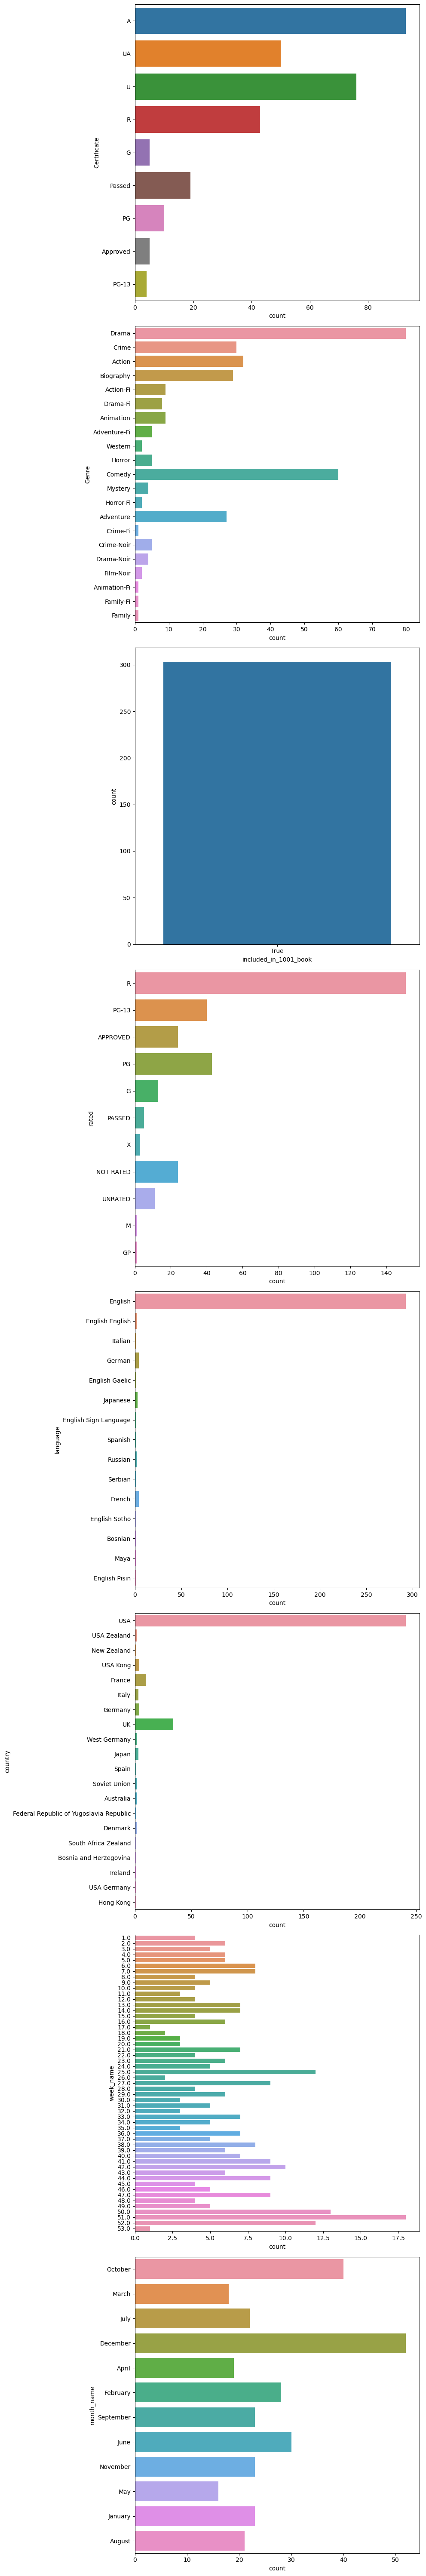

In [89]:
plot_count(categ_reduced)

In [83]:
def plot_hist(df_continuous):
    plt_size = len(df_continuous.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in df_continuous.columns:
        sns.histplot(data=df_continuous, x=df_continuous[i], ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()
    

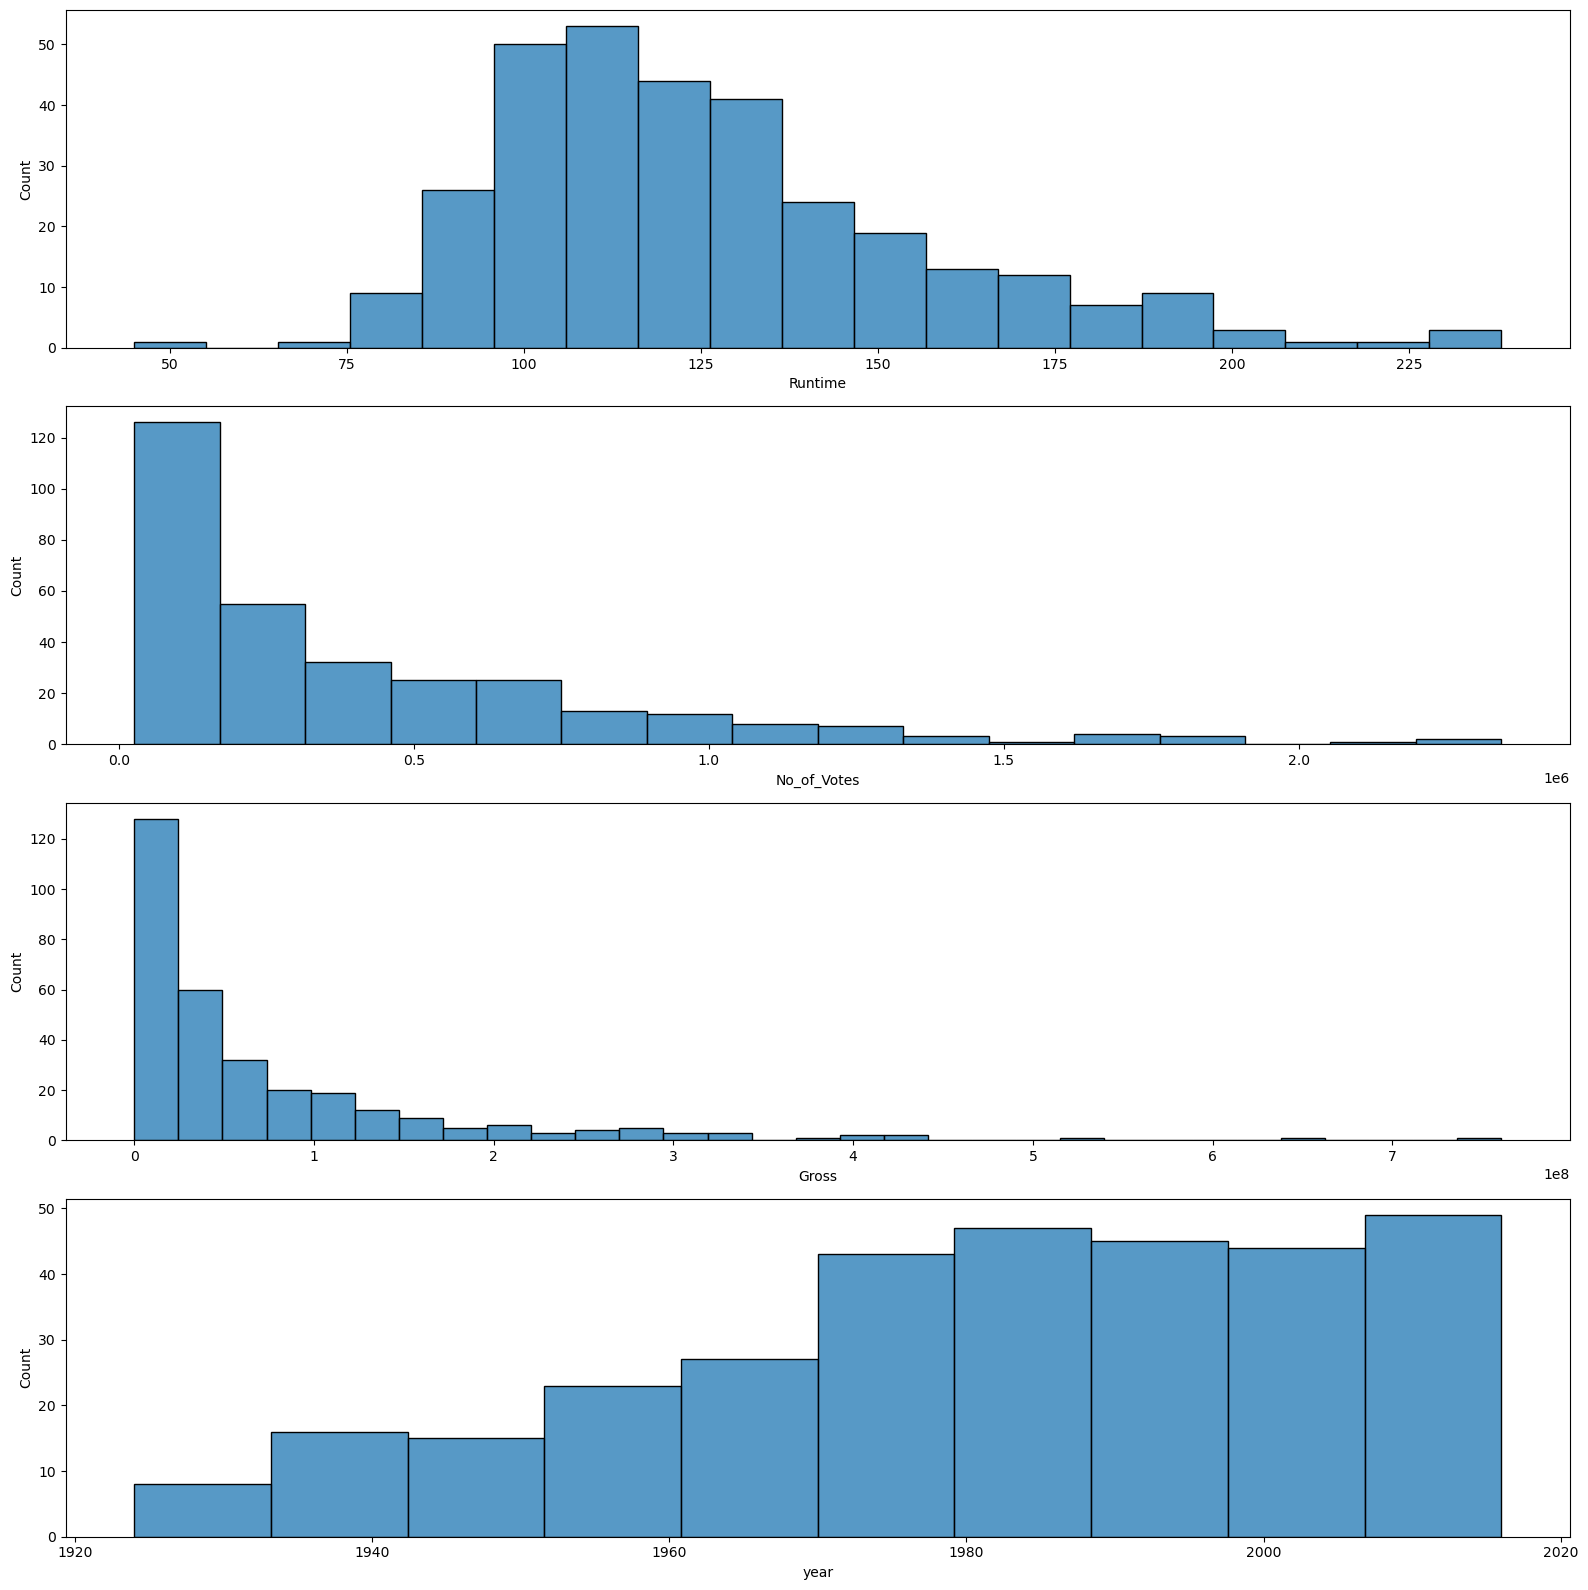

In [84]:
plot_hist(numerical)

<AxesSubplot: xlabel='IMDB_Rating', ylabel='No_of_Votes'>

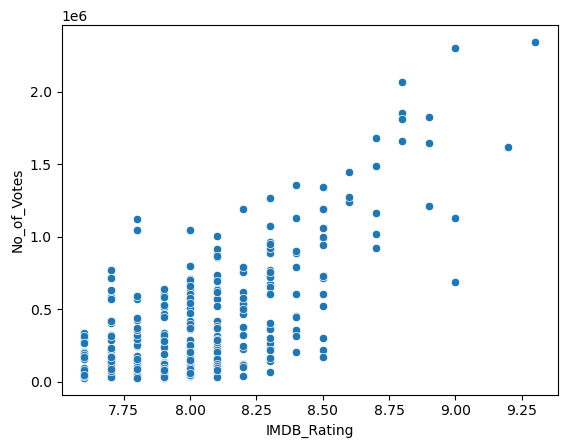

In [86]:
sns.scatterplot(data=data, x="IMDB_Rating", y="No_of_Votes")

<AxesSubplot: xlabel='IMDB_Rating', ylabel='Gross'>

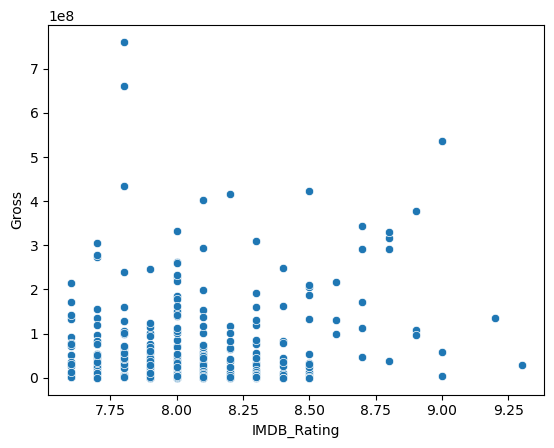

In [90]:
sns.scatterplot(data=data, x="IMDB_Rating", y="Gross")

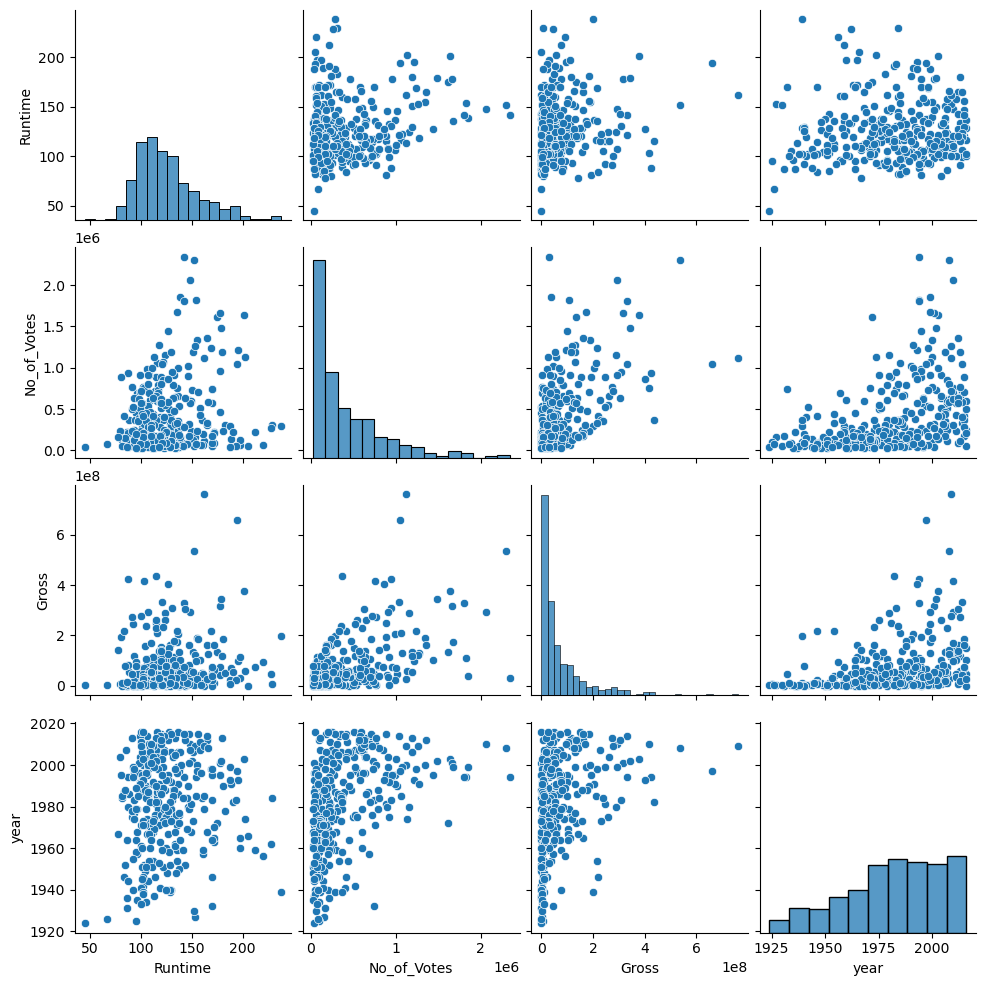

In [91]:
sns.pairplot(numerical)